# Load the data

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory
dirpath = 'Dataset/'
import os
for dirname, _, filenames in os.walk(dirpath):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

Dataset/offers_cluj-napoca_2022-03-25.csv


In [2]:
## import libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from pylab import rcParams
from warnings import filterwarnings
filterwarnings('ignore')
rcParams['figure.figsize'] = 12,7
sns.color_palette("hls", 8)

[(0.86, 0.3712, 0.33999999999999997),
 (0.86, 0.7612000000000001, 0.33999999999999997),
 (0.5688000000000001, 0.86, 0.33999999999999997),
 (0.33999999999999997, 0.86, 0.5012000000000001),
 (0.33999999999999997, 0.8287999999999999, 0.86),
 (0.33999999999999997, 0.43879999999999986, 0.86),
 (0.6311999999999998, 0.33999999999999997, 0.86),
 (0.86, 0.33999999999999997, 0.6987999999999996)]

In [3]:
df = pd.read_csv(dirpath+"/offers_cluj-napoca_2022-03-25.csv")  # Reading dataset

# Exploratory Data Analysis

In [4]:
df.head() # looking at the first 5 rows 

,bathrooms,floor,rooms,surface,state,zone,ad_price
0,1.0,0.500,2.0,82.0,nou,Marasti,750.0
1,1.0,0.250,2.0,65.0,utilizat,Oasului,350.0
2,1.0,0.000,2.0,72.0,nou,Manastur,372.0
3,1.0,0.333,2.0,65.0,renovat,Ploiesti,470.0
4,1.0,2.000,2.0,45.0,nou,Dambul Rotund,290.0


In [7]:
df.shape # looking at the shape. we have 4600 rows and 18 columns.

(853, 7)

In [8]:
df.info() # looking at information

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 853 entries, 0 to 852
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   bathrooms  853 non-null    float64
 1   floor      853 non-null    float64
 2   rooms      853 non-null    float64
 3   surface    853 non-null    float64
 4   state      853 non-null    object 
 5   zone       853 non-null    object 
 6   ad_price   853 non-null    float64
dtypes: float64(5), object(2)
memory usage: 46.8+ KB


In [9]:
df.describe()  # looking at statistical info

,bathrooms,floor,rooms,surface,ad_price
count,853.000000,853.000000,853.000000,853.000000,853.000000
mean,1.215709,0.627067,2.243845,68.125440,500.113716
std,0.457475,0.863865,0.818851,31.489129,219.716110
min,1.000000,-1.000000,1.000000,11.000000,150.000000
25%,1.000000,0.000000,2.000000,54.000000,399.000000
50%,1.000000,0.500000,2.000000,63.000000,450.000000
75%,1.000000,0.875000,3.000000,76.000000,550.000000
max,4.000000,9.000000,10.000000,500.000000,3000.000000


Let's convert the variables that are float in our dataset to int.

In [11]:
df.isnull().sum().sort_values(ascending=False) # checking for missing observations

bathrooms    0
floor        0
rooms        0
surface      0
state        0
zone         0
ad_price     0
dtype: int64

There are no missing observations in our data set. 

# Data Visualization

<Figure size 1440x720 with 0 Axes>

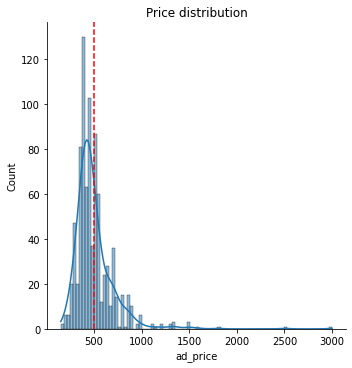

In [23]:
price_des = df['ad_price'].describe()

plt.figure()
sns.displot(df['ad_price'], kde = True)
plt.axvline(price_des['mean'], linestyle = "--", color = "red")
plt.title('Price distribution')
rcParams['figure.figsize'] = 20,10

The price has a right-skewed distribution. To bring this closer to normal, we can subtract the data above 1000000 from our dataset.

In [13]:
a = df[["ad_price"]].mean()

a

ad_price    500.113716
dtype: float64

In [14]:
len(df)

853

In [15]:
df["ad_price"].max()

3000.0

In [16]:
df["ad_price"].min()

150.0

 In our dataset, we see that the lowest value of the price is "0" and the highest value is "26590000". I think $0 will not be a house and a value like 26590000 will not appeal to the potential buyer. So I decided to set a range to be greater than 20000 and less than 1500000.

(array([681.,   0.,   0., 165.,   0.,   0.,   2.,   0.,   0.,   5.]),
 array([1. , 1.3, 1.6, 1.9, 2.2, 2.5, 2.8, 3.1, 3.4, 3.7, 4. ]),
 <BarContainer object of 10 artists>)

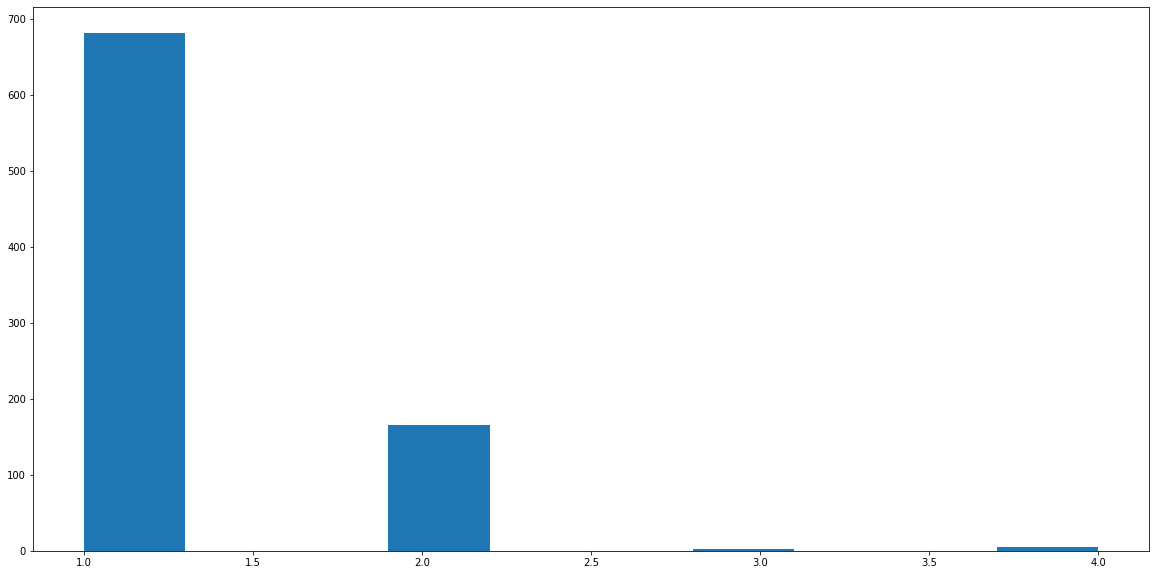

In [19]:
plt.hist(df["bathrooms"])

(array([  9., 632., 167.,  10.,  17.,  12.,   2.,   1.,   1.,   2.]),
 array([-1.,  0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9.]),
 <BarContainer object of 10 artists>)

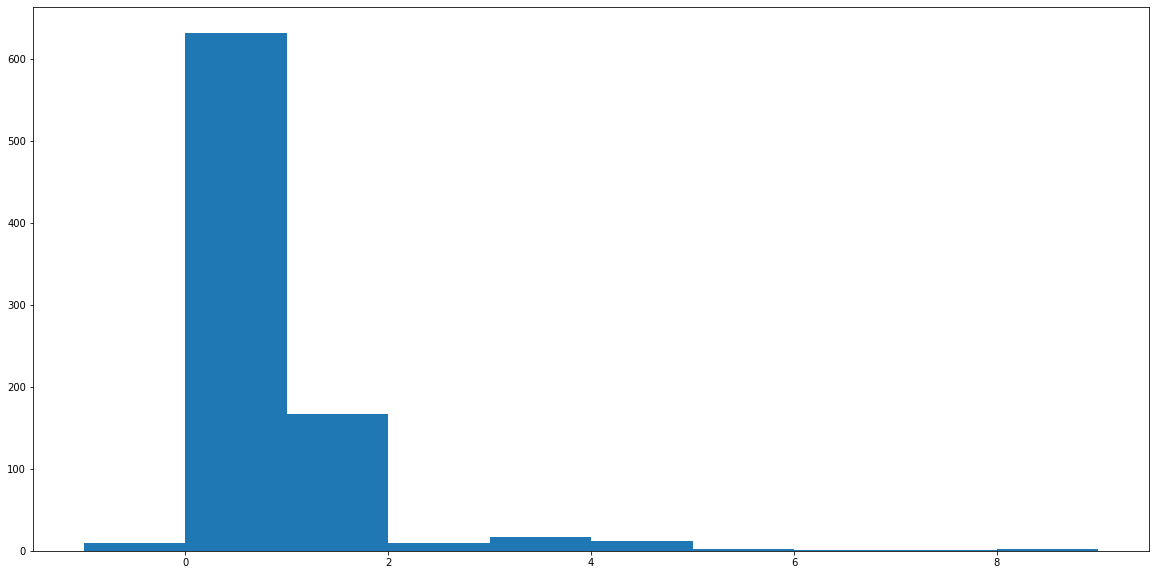

In [20]:
plt.hist(df["floor"])

(array([330., 479.,  33.,   6.,   2.,   1.,   0.,   0.,   1.,   1.]),
 array([ 11. ,  59.9, 108.8, 157.7, 206.6, 255.5, 304.4, 353.3, 402.2,
        451.1, 500. ]),
 <BarContainer object of 10 artists>)

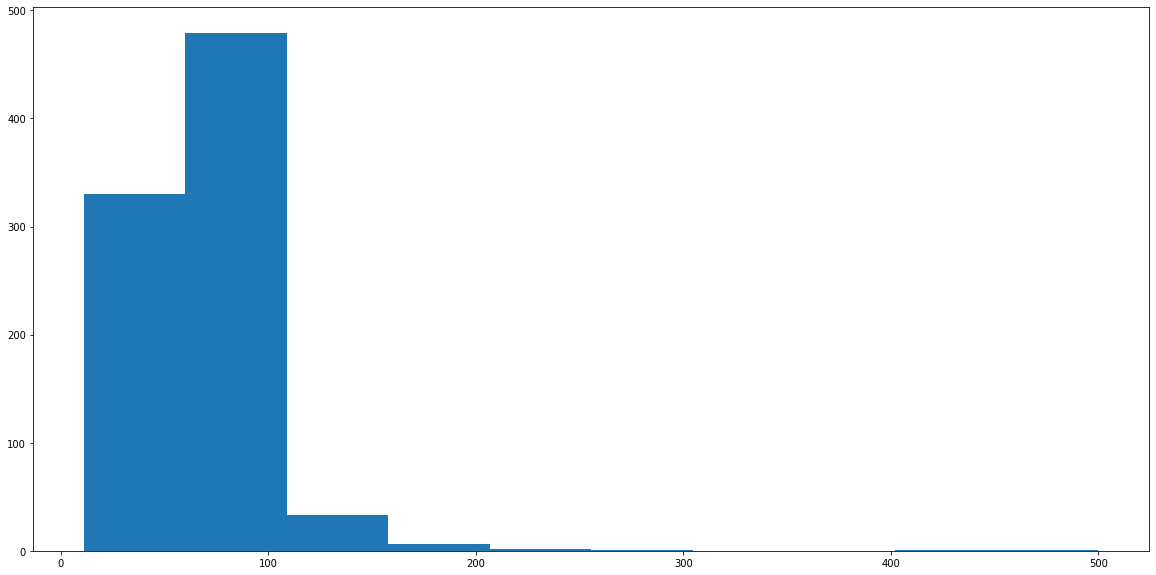

In [25]:
plt.hist(df["surface"]) 

When we examine this histosgaram graph, I decide to create new categories. First, the category created as Basement gives information about whether there is a basement area or not. Secondly, the situation gives information about whether the houses are old or new in the range determined according to the year of construction. It was determined as "new" after "old" before 1990. Third, renewal_status informs about the renewal status of the houses as "renewed" or "not renewed".

In [30]:
#!pip install plotly

In [28]:
import plotly.express as px
import plotly.graph_objects as go

There are 4 unique state


Count of state


utilizat          389
nou               253
renovat           209
in constructie      2
Name: state, dtype: int64


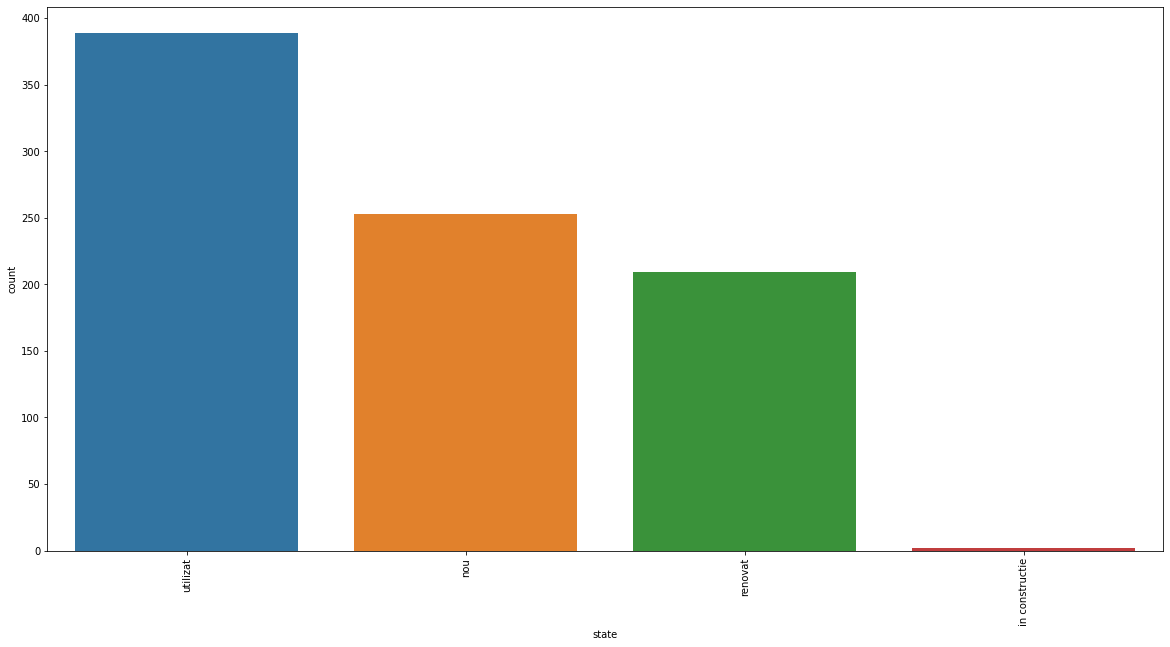



There are 136 unique zone


Count of zone


Gheorgheni          111
Marasti              96
Manastur             64
Cluj-Napoca          62
Zorilor              58
Buna Ziua            52
Centrul Vechi        38
Intre Lacuri         33
Plopilor             20
Grigorescu           19
Andrei Muresanu      19
Dambul Rotund        17
Gruia                16
Bulgaria             11
Colonia Borhanci     11
Europa                8
Iris                  7
Onisifor Ghibu        5
Calea Baciului        5
Fantanele             5
Name: zone, dtype: int64


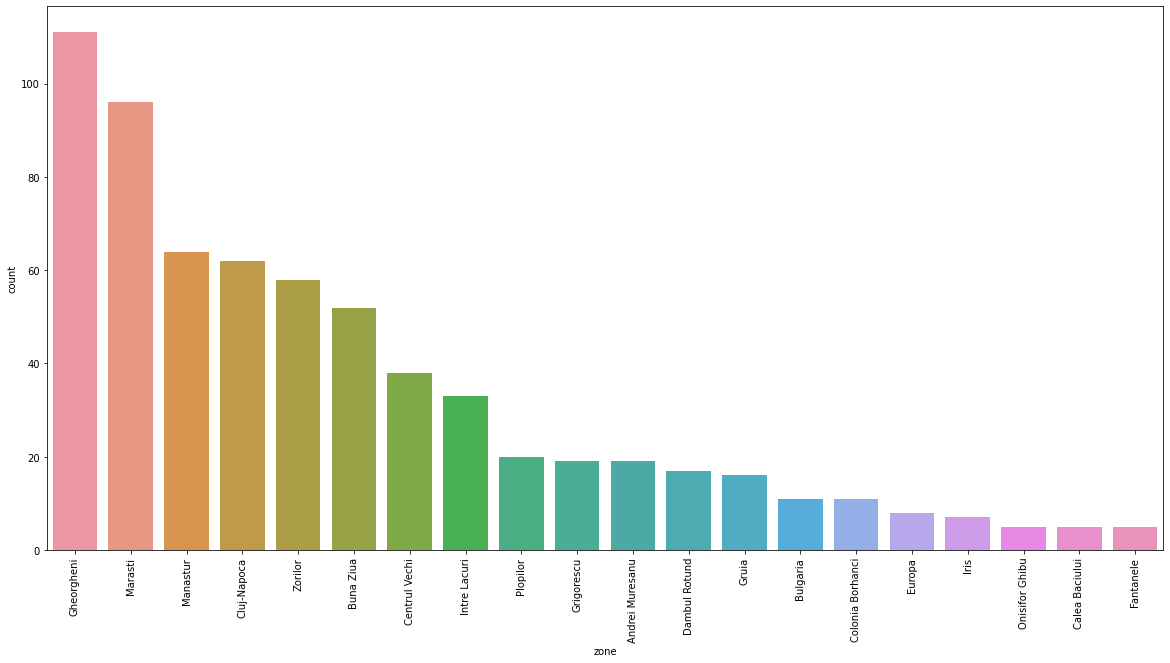

In [27]:
##plotting the categorical features
cat_variable = df.dtypes==object
cat_variable = df.columns[cat_variable].tolist()

# Count of products per keys
def bar_plot(data,feature):
    print(f'There are {len(set(data[feature]))} unique {feature}')
    print('\n')
    sns.countplot(x = feature,
              data = data,
              order = data[feature].value_counts(ascending=False)[0:20].index)
    plt.xticks(rotation=90)
    print(f'Count of {feature}')
    print('\n')
    print(data[feature].value_counts(ascending=False)[0:20])
    plt.show()
    print('\n')
    
for i in cat_variable:
    bar_plot(df,i)

45.1% of the homes in our dataset have 3 bedrooms. It is also possible to have 4 bedrooms, but houses with 5, 6, 8 bedrooms are rare.

# Converting Categorical Variables to Numeric Variables

In [38]:
cat_variable = df.dtypes==object
cat_variable = df.columns[cat_variable].tolist()

In [39]:
from sklearn.preprocessing import LabelEncoder
lb = LabelEncoder()
df[cat_variable] = df[cat_variable].apply(lambda col: lb.fit_transform(col.astype(str)))

In [41]:
df.head()

,level_0,index,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,street,city,statezip,country,day,month,year,basement,situation,renewal_status
0,0,0,313000,3,1,1340,7912,1,0,0,...,18810 Densmore Ave N,Shoreline,WA 98133,USA,2,5,2014,No,Former,Renewed
1,2,2,342000,3,2,1930,11947,1,0,0,...,26206-26214 143rd Ave SE,Kent,WA 98042,USA,2,5,2014,No,Former,Not_renewed
2,3,3,420000,3,2,2000,8030,1,0,0,...,857 170th Pl NE,Bellevue,WA 98008,USA,2,5,2014,Yes,Former,Not_renewed
3,4,4,550000,4,2,1940,10500,1,0,0,...,9105 170th Ave NE,Redmond,WA 98052,USA,2,5,2014,Yes,Former,Renewed
4,5,5,490000,2,1,880,6380,1,0,0,...,522 NE 88th St,Seattle,WA 98115,USA,2,5,2014,No,Former,Renewed


# Getting Rid of Outliers

In [40]:
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1
print(IQR)

level_0             2275.25
index               2275.25
price             314412.50
bedrooms               1.00
bathrooms              1.00
sqft_living         1100.00
sqft_lot            5778.25
floors                 1.00
waterfront             0.00
view                   0.00
condition              1.00
sqft_above          1060.00
sqft_basement        590.00
yr_built              46.00
yr_renovated        1999.00
street              2184.50
city                  18.00
statezip              34.00
country                0.00
day                   16.00
month                  1.00
year                   0.00
basement               1.00
situation              1.00
renewal_status         1.00
dtype: float64


In [41]:
df =df[~((df < (Q1 - 1.5 * IQR)) |(df > (Q3 + 1.5 * IQR))).any(axis=1)]
df.dropna(inplace=True)

In [42]:
df

,level_0,index,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,street,city,statezip,country,day,month,year,basement,situation,renewal_status
0,0,0,313000,3,1,1340,7912,1,0,0,...,1470,36,62,0,2,5,2014,0,0,1
1,2,2,342000,3,2,1930,11947,1,0,0,...,2221,18,26,0,2,5,2014,0,0,0
2,3,3,420000,3,2,2000,8030,1,0,0,...,4111,3,7,0,2,5,2014,1,0,0
3,4,4,550000,4,2,1940,10500,1,0,0,...,4198,31,31,0,2,5,2014,1,0,1
4,5,5,490000,2,1,880,6380,1,0,0,...,3394,35,54,0,2,5,2014,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4429,4545,4595,308166,3,1,1510,6360,1,0,0,...,3324,35,62,0,9,7,2014,0,0,1
4430,4546,4596,534333,3,2,1460,7573,2,0,0,...,923,3,6,0,9,7,2014,0,0,1
4431,4547,4597,416904,3,2,3010,7014,2,0,0,...,3890,32,37,0,9,7,2014,0,1,0
4432,4548,4598,203400,4,2,2090,6630,1,0,0,...,3372,35,71,0,10,7,2014,1,0,0


In [43]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3406 entries, 0 to 4433
Data columns (total 25 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   level_0         3406 non-null   int64
 1   index           3406 non-null   int64
 2   price           3406 non-null   int64
 3   bedrooms        3406 non-null   int64
 4   bathrooms       3406 non-null   int64
 5   sqft_living     3406 non-null   int64
 6   sqft_lot        3406 non-null   int64
 7   floors          3406 non-null   int64
 8   waterfront      3406 non-null   int64
 9   view            3406 non-null   int64
 10  condition       3406 non-null   int64
 11  sqft_above      3406 non-null   int64
 12  sqft_basement   3406 non-null   int64
 13  yr_built        3406 non-null   int64
 14  yr_renovated    3406 non-null   int64
 15  street          3406 non-null   int64
 16  city            3406 non-null   int64
 17  statezip        3406 non-null   int64
 18  country         3406 non-nul

<AxesSubplot:>

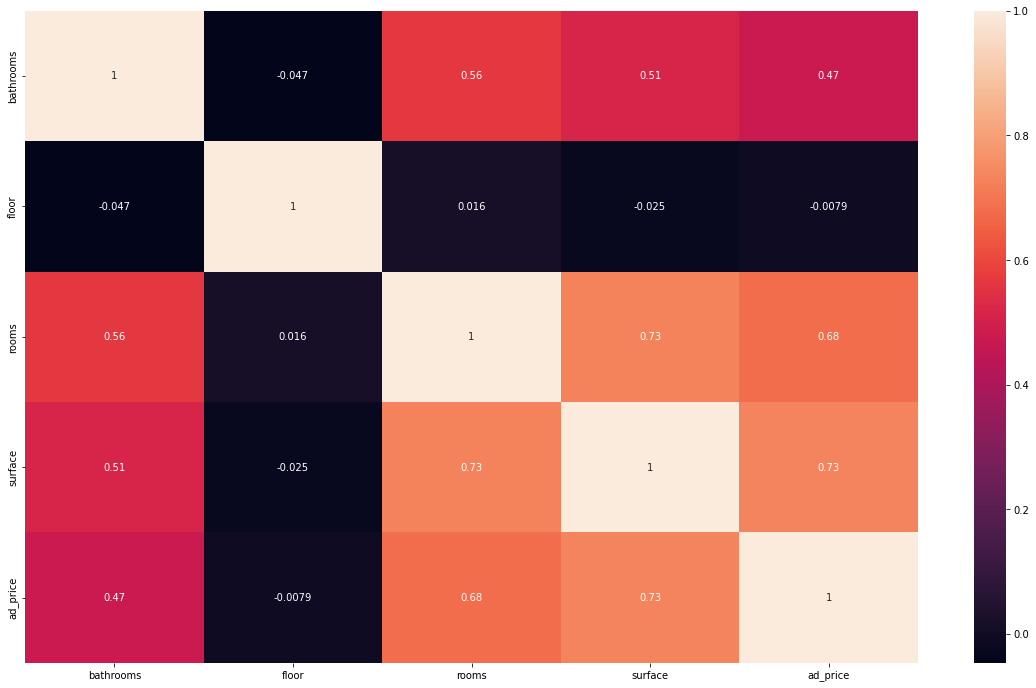

In [28]:
plt.figure(figsize=(20,12))
sns.heatmap(df.corr(),annot=True)

The model works best with LightGBM.